C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there

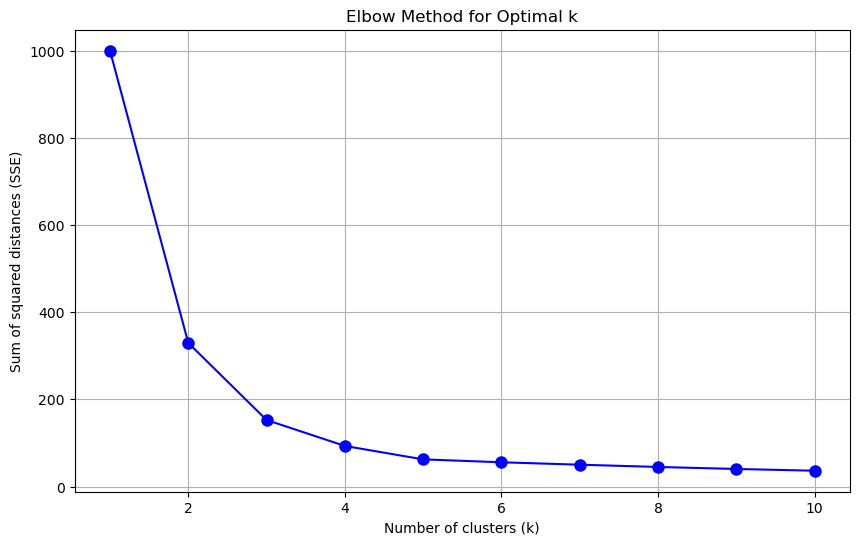

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


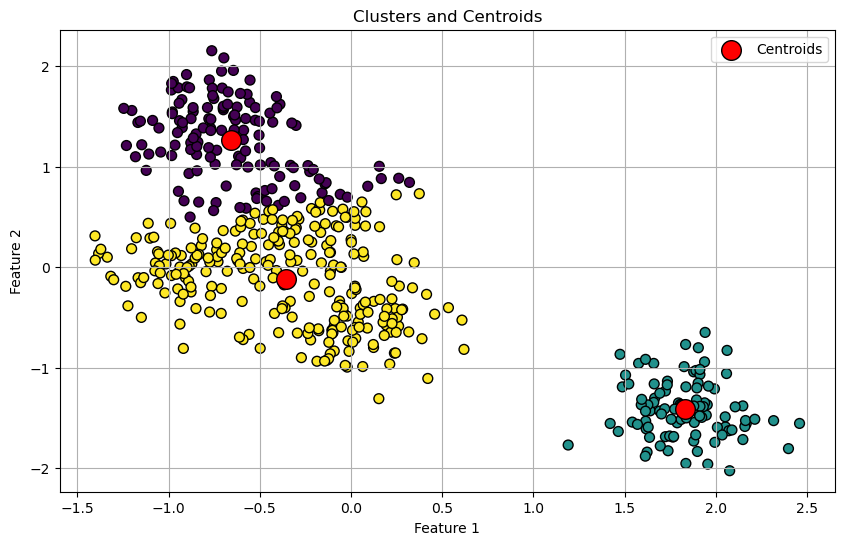

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the data
df = pd.read_csv('cluster_data.csv')
X = df["Feature 1"].values.reshape(-1, 1)
Y = df["Feature 2"].values.reshape(-1, 1)

# Combine X and Y into a single array for clustering
data = pd.DataFrame({'Feature 1': X.flatten(), 'Feature 2': Y.flatten()})
XY = pd.concat([pd.DataFrame(X), pd.DataFrame(Y)], axis=1)
XY.columns = ['Feature 1', 'Feature 2']

# Step 2: Preprocess the data
scaler = StandardScaler()
XY_scaled = scaler.fit_transform(XY)

# Step 3: Apply the elbow method
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(XY_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Step 4: Fit K-means with optimal k
optimal_k = 3  # Assume optimal k is 3 from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(XY_scaled)
data['Cluster'] = kmeans.labels_

# Step 5: Plot the scatter diagrams
plt.figure(figsize=(10, 6))
plt.scatter(XY_scaled[:, 0], XY_scaled[:, 1], c=data['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters and Centroids')
plt.legend()
plt.grid(True)
plt.show()
